<a href="https://colab.research.google.com/github/rishabh102004/nmep-stuff/blob/main/Rishabh_Varshney_For_Student_SP24_NMEP_Lecture_6_NumPy%2C_Pandas%2C_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Lecture 5!
**NumPy, Pandas, and Matplotlib** are essential tools in Python for processing and visualizing data, so it's super helpful for working on our projects! In this notebook, we will introduce some tools to get you familiar with processing numerical data and time-series signals! This lecture lays the important groundwork for the upcoming signal processing and machine learning workshops.

Made with 🧠 by: Phil Xie, Tavish Mishra, Reuben Thomas, Parth Desai

# NumPy

**NumPy** is a scientific computing library in Python that has a large collection of math functions for us to work with arrays and matrices, so it's super helpful for us to work with time series data, which often are in the form of arrays or matrices! In this notebook, we'll focus on functions that help us the most in the **Neurotech** context.

To use functions in NumPy, we have to import NumPy to our workspace. This is done by the command `import numpy`. By convention, we rename `numpy` as `np` for convenience.

In [1]:
# by convention, import numpy as np
import numpy as np

## Foray into Array

A NumPy array is like a list with multidimensional support and more functions. We will be using it a lot.

Arithmetic operations on NumPy arrays correspond to elementwise operations.

Important functions/attributes:

- `.shape` returns the dimensions of the array.

- `.ndim` returns the number of dimensions.

- `.size` returns the number of elements in the array.

- `len()` returns the first dimension.

- `np.unique()` returns the unique classes in an array (ignores all repeated values).



Array Creation

In [2]:
import numpy as np
x = np.array([1,2,3])
print("x1: \n", x)

x = np.array([[1, 2, 3], [4, 5, 6]]) # Create multi-dimensional array
print("x2: \n", x)

print(type(x))

x1: 
 [1 2 3]
x2: 
 [[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


In [3]:
# Reminder that numpy arrays can contain not just numbers!
central_dogma = ['mitrochondria', 'is', 'the', 'powerhouse', 'of', 'the', 'cell']
central_dogma = np.array(central_dogma)

print(type(central_dogma))

<class 'numpy.ndarray'>


In [4]:
zeros = np.zeros((3, 4)) # creates a numpy array of the prescribed dimension filled with zeros - https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
ones = np.ones((3, 4))

print("zeros:\n", zeros)
print("ones:\n", ones)

zeros:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
ones:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [5]:
full = np.full((3, 4), 5) # similar to np.zeros, but can set with any value - https://numpy.org/doc/stable/reference/generated/numpy.full.html

print("full:\n", full) # notice the 5's are not floats!

full:
 [[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]


In [6]:
random_arr = np.random.random((2, 3))
print('random:\n', random_arr)

random:
 [[0.99530713 0.23184362 0.03244543]
 [0.93053351 0.6837767  0.79514241]]


In [7]:
print(np.random.randint(low=0, high=10, size=(4,5)))

[[2 5 5 8 7]
 [0 5 5 9 5]
 [6 9 0 8 6]
 [0 3 2 6 9]]


In [8]:
# Ranges! Useful for creating indices/plot over time
range_arr = np.arange(1, 10, 1) # define STEPSIZE, incl. min and excl. max

linspace_arr = np.linspace(1, 10, 10) # define HOW MANY values, incl. min and max

print(range_arr)
print(linspace_arr)

[1 2 3 4 5 6 7 8 9]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Metadata: great for debugging!!

In [9]:
# for our convenience
print(x)

[[1 2 3]
 [4 5 6]]


In [10]:
print("Number of Dimensions:", x.ndim)

Number of Dimensions: 2


In [11]:
print("Dimensions:", x.shape)

Dimensions: (2, 3)


In [12]:
print("Size:", x.size)

Size: 6


In [13]:
print("Length:", len(x))

Length: 2


Operations

In [14]:
a = np.array([1, 2, 3])

print("a = ", a)

# elementwise arithmetic
print("a * a = ", a * a)
print()


a =  [1 2 3]
a * a =  [1 4 9]



In [15]:
# in-place arithmetic (changes a)
print(a)
a += 10
print(a)

[1 2 3]
[11 12 13]


Multiply elementwise ("broadcasting"):
<br>(This is handy if we had amplified our biosignal with hardware, and need to rescale the data! E.g. EEG signals are in the microvolts range (smol), so we amplify them a bunch when recording. So when we try to analyze the data, we want to scale the entire signal down again to get the original signal!)

In [16]:
a = np.array([1, 2, 3])
print("a * 3 =\n", a * 3)

a * 3 =
 [3 6 9]


Dot Product: (compute similarity)

In [17]:
print("a • a =\n", np.dot(a, a))

a • a =
 14


Matrix Multiplication: np.matmul() (shorthand: `@`) (Applying a known transform to the data)

---



In [18]:
p = np.full((2, 2, 2), 2.)
q = np.full((2, 2, 2), 3.)

In [19]:
print("p @ q =\n", p @ q)

p @ q =
 [[[12. 12.]
  [12. 12.]]

 [[12. 12.]
  [12. 12.]]]


Matrix Multiplication is different than dot product! (although same in 2D)

In [20]:
print("p • q =\n", np.dot(p, q))

p • q =
 [[[[12. 12.]
   [12. 12.]]

  [[12. 12.]
   [12. 12.]]]


 [[[12. 12.]
   [12. 12.]]

  [[12. 12.]
   [12. 12.]]]]


## NumPy Ninja (Slicing)

NumPy uses pass-by-reference semantics so it creates views into the existing array, without implicit copying. This is particularly helpful with very large arrays because that would take up more space and time.

In [21]:
x = np.arange(0, 7, 1)
print(x)

[0 1 2 3 4 5 6]


We slice an array from `a` to `b - 1` with `[a:b]`.

In [22]:
y = x[0:5]
print(y)

[0 1 2 3 4]


Since slicing does not copy the array, changing `y` changes `x`:

In [23]:
y[0] = 42
print(x)
print(y)

[42  1  2  3  4  5  6]
[42  1  2  3  4]


To actually copy `x`, we should use `.copy`:

In [24]:
x = np.array([1, 2, 3, 4, 5, 6])
y = x.copy()
y[0] = 42
print(x)
print(y)

[1 2 3 4 5 6]
[42  2  3  4  5  6]


## Every asks how to NumPy, nobody ever asks WHERE to NumPy...

In [25]:
eeg_data = np.linspace(0, 1, 11)
print(eeg_data)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [26]:
# Let's explore this in the context of thresholding!
threshold = 0.5

You can put a condition as the index to filter for values! This creates a copy of the original array.

In [27]:
eeg_data[eeg_data > threshold]

array([0.6, 0.7, 0.8, 0.9, 1. ])

In [28]:
eeg_data[eeg_data % 0.2 == 0]

array([0. , 0.2, 0.4, 0.8])

**`np.where`** \\
syntax: `numpy.where(condition, [x, y, ]/)`

In [29]:
# using just the condition as argument gives you indices where the condition is true
np.where(eeg_data > threshold)

(array([ 6,  7,  8,  9, 10]),)

In [30]:
# filling in two extra arguments populates an array of the same size depending
# on if the condition is satisfied
above_threshold = np.where(eeg_data > threshold, 1, 0) #so it's filled with 1 if its true, 0 if not
print(above_threshold)

[0 0 0 0 0 0 1 1 1 1 1]


## Treat it like Play-Doh (Reshaping)

Sometimes, certain functions might require a specified shape as input, so it's important that we know how to get existing arrays into that shape. In other cases, it might be easier to first produce a linear array of data, then get it into the shape we want. This is where reshaping functions can help!

In [31]:
nine = np.arange(1, 10, 1)
print(nine)

[1 2 3 4 5 6 7 8 9]


In [32]:
nine_squared = nine.reshape((3,3))
print(nine_squared)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [33]:
nine.reshape((3,3), order='F') # vertically ordered!

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [34]:
nine_squared.ravel() # returns a 1D VIEW of the array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
nine_squared.flatten() # returns a 1D COPY of the array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Studyin Stacks
(If we have multiple channels of data, stacking them together can make it easier to process by syncing timestamps and broadcasting operations)

In [36]:
three = nine[0:3]
print(three)

[1 2 3]


In [37]:

np.stack((three, three, three))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [38]:
np.vstack((three, three, three))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [39]:
np.hstack((three, three, three))

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [40]:
np.concatenate((three, three, three))

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [41]:
# Pre-Transpose
a = np.random.random((10, 20, 30, 40, 50))
print("Number of dimensions:", a.ndim)
print("Shape:", a.shape)

Number of dimensions: 5
Shape: (10, 20, 30, 40, 50)


In [42]:
# Transpose: Switches dimensions around
a = np.transpose(a, (1, 3, 0, 2, 4)) # second arg is the indices of the dimensions tuple
print("Shape:", a.shape)

Shape: (20, 40, 10, 30, 50)


Squeeze!

In [43]:
# Squeeze: removes all dimensions of 1 (the []'s around your array)
a = np.zeros((1, 5, 1, 1))
print('Pre-squeeze Shape:', a.shape)
print(a)
print()

Pre-squeeze Shape: (1, 5, 1, 1)
[[[[0.]]

  [[0.]]

  [[0.]]

  [[0.]]

  [[0.]]]]



In [44]:
a = np.squeeze(a)
print('Squeezed Shape:', a.shape)
print(a)

Squeezed Shape: (5,)
[0. 0. 0. 0. 0.]


Here's a reshape cheatsheet that's helpful for visualizing what these functions do!
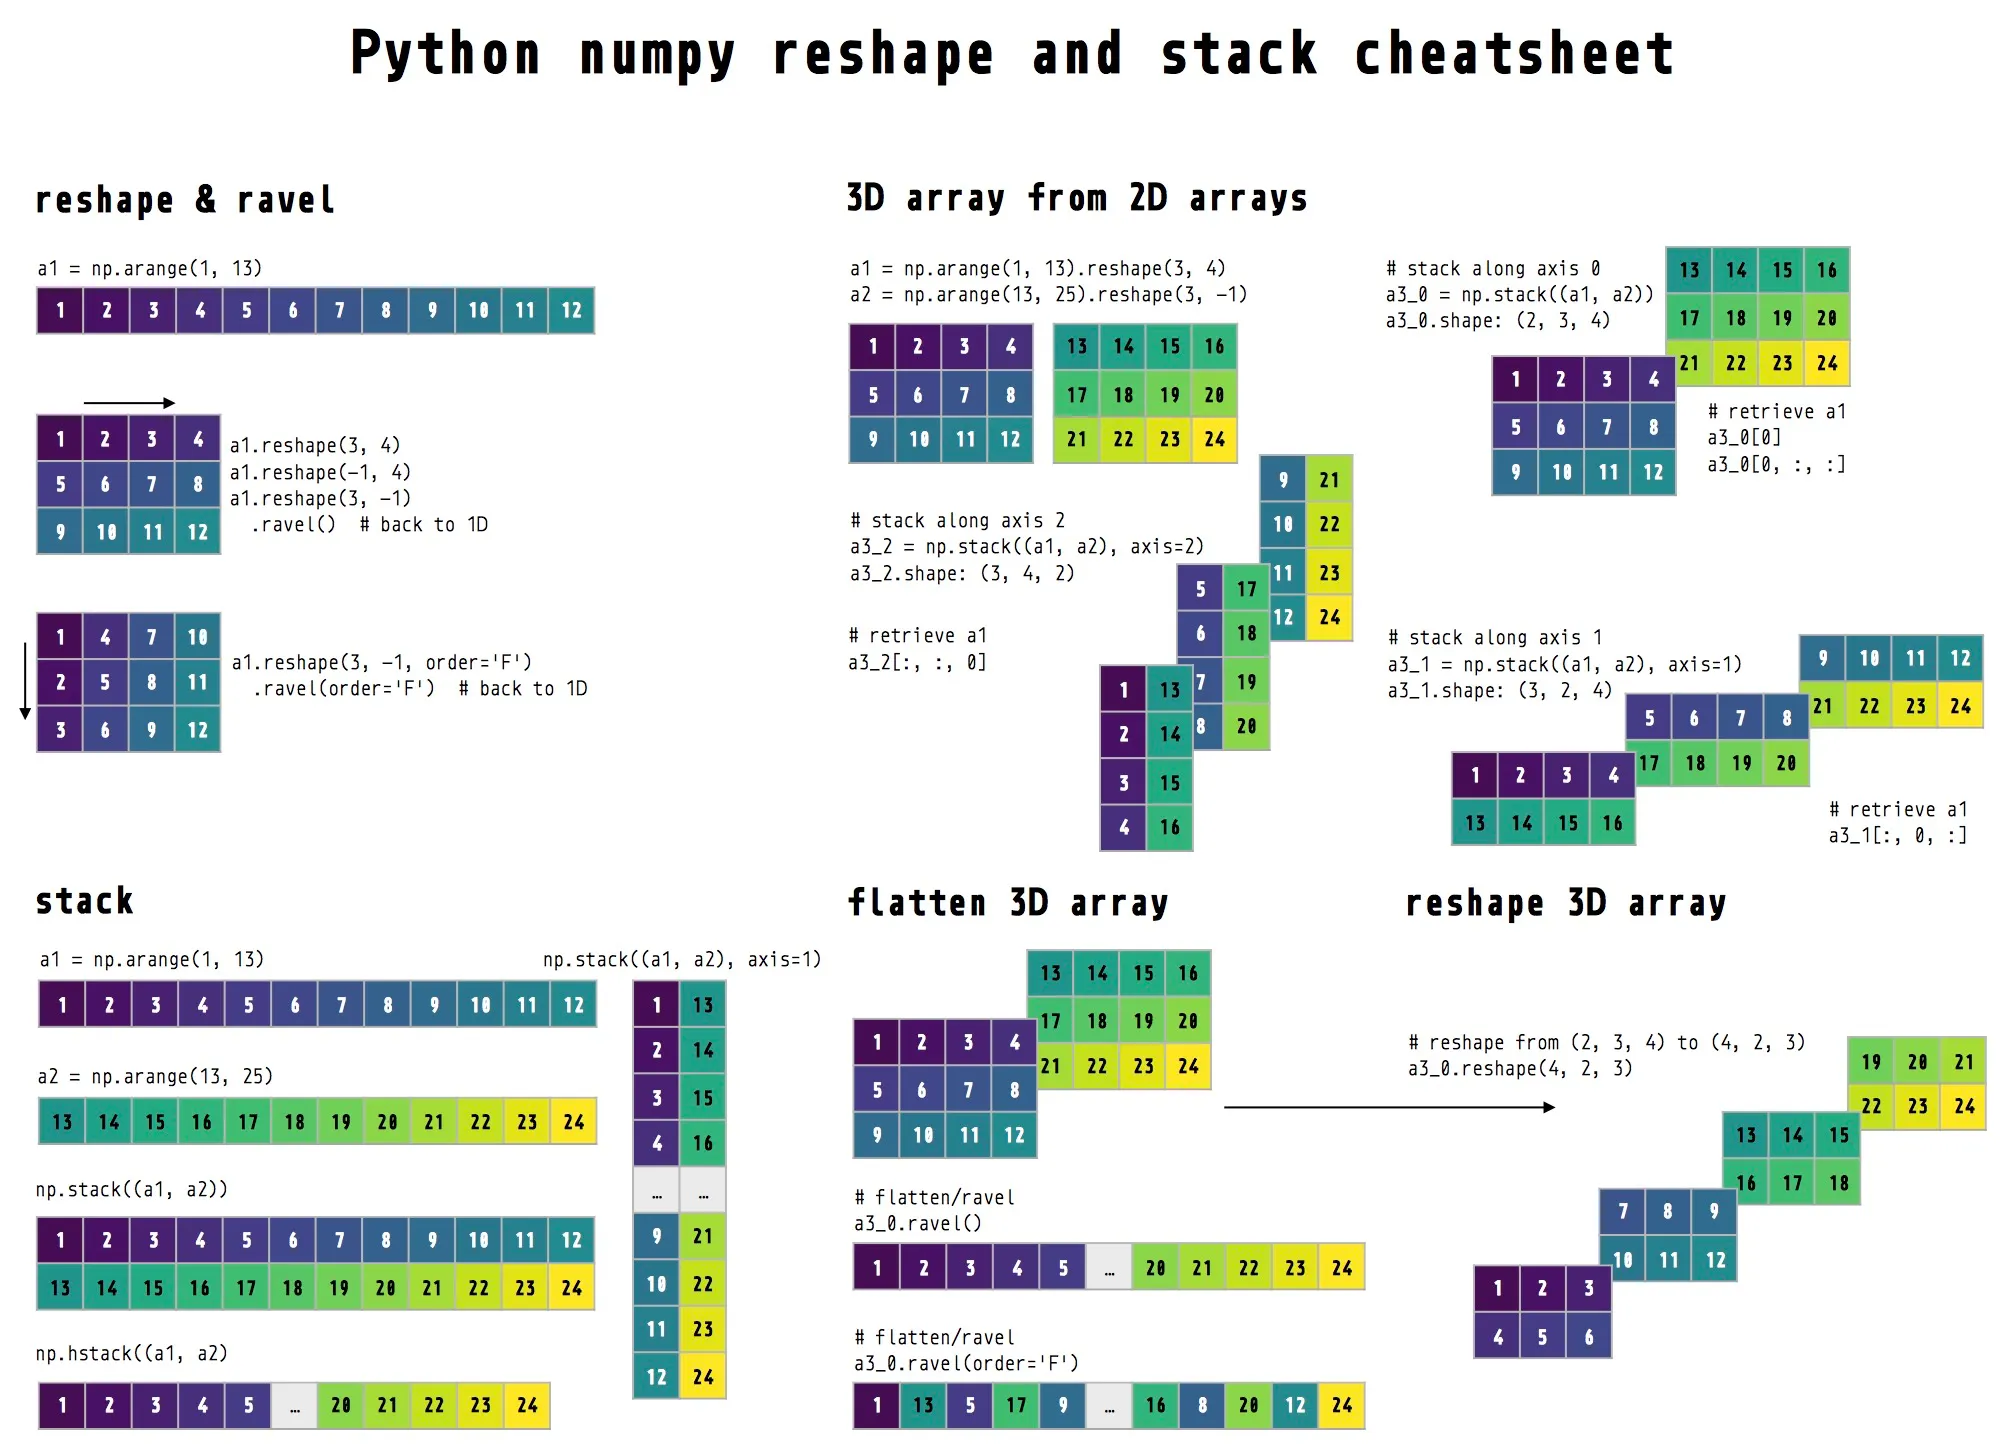

## I am speed (np.vectorize)

`np.vectorize` is a function that takes another function `f` as input, and outputs a function that works the same as `f` but is faster for array inputs. This new function uses the inner workings of `numpy` in order to speed up the running of functions, as well as make a more convenient way of running a function on multiple inputs, rather than a `for` loop.

In [45]:
from math import sqrt
from tqdm import tqdm # this packages shows you a progress bar with timers on loops!

In [46]:
def H_2_mag(w): # square magnitude of a transfer function
    neum_real = 5* 10**5
    neum_imm = 50 * w
    denom_real = 5*10**5 - w**2
    denom_imm = 5100*w
    return sqrt(neum_real**2 + neum_imm**2) / sqrt(denom_real**2 + denom_imm**2)

In [47]:
# Create Vectorized Function
vectorize_H_mag_2 = np.vectorize(H_2_mag)

In [48]:
idx_1 = np.linspace(0, 10, 5000000)
idx_2 = np.linspace(0, 10, 5000000)

In [49]:
exponential_array_1 = 10**idx_1
exponential_array_2 = 10**idx_2

In [50]:
result_1 = np.zeros(5000000)

for i in tqdm(range(len(result_1))):
    result_1[i] = H_2_mag(exponential_array_1[i])


100%|██████████| 5000000/5000000 [00:29<00:00, 170377.87it/s]


In [51]:
for i in tqdm(range(1)):
    result_2 = vectorize_H_mag_2(exponential_array_2)

100%|██████████| 1/1 [00:07<00:00,  7.69s/it]


Roughly, `np.vectorize` works by compressing your python code into how NumPy works instead, which is built in C. Because C is a lower-level language, meaning that it works closer to how the computer actually represents and stores things, it runs much faster than vanilla Python. So, `np.vectorize` takes advantage of this, and it's useful for writing cleaner code compared to a complicated `for` loop and can offer a speed improvement if you need to run a function on a larger number of inputs.  

# Matplotlib!

When working with data science/machine learning in any capacity, it's useful to be able to visualize quantities in our data or from our model, such as the distribution of features in our data, loss values from our model, or any number of things that can be displayed in a graph format.

`matplotlib` is a commonly used library that allows us to graph almost anything, and add titles, labels, custom axes, and a whole host of convenient things in order to make useful graphics for data.

The call to `import matplotlib as mpl` and `import matplotlib.pyplot as plt` allows us to import the 2 principle components of `matplotlib` with convenient, short names so that we can call them and their functions easily.

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

To create an empty figure on which you wish to create a graph, use `plt.figure()`.
`plt.subplots` has 2 outputs: the figure `fig`, where graphics occur, and the `axs` object, which is an abstracted Axes object defined in `plt` that allows us to change things like scale and step size in our graph, as well as what we add plots to in order to actually display graphs in `fig`.

In [53]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 640x480 with 0 Axes>

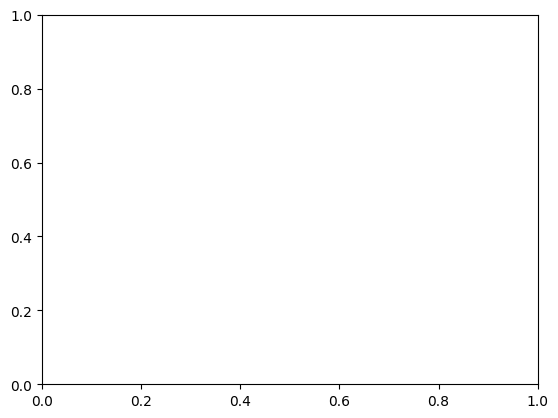

In [54]:
fig, ax = plt.subplots()  # a figure with a single Axes

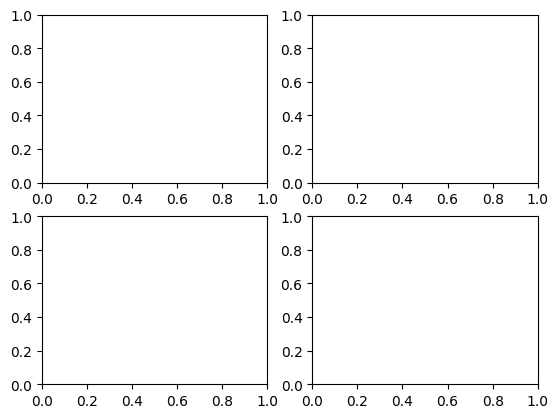

In [55]:
fig, ((axs0, axs1), (axs2,axs3)) = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

In the above code cell, the last line `fig, ((axs0, axs1), (axs2,axs3)) = plt.subplots(2, 2)` creates one figure `fig` with 4 axes: `axs0`,  `axs1`,  `axs2`,  `axs3`, where we index from left to right starting at the top left(so that `axs0` is the top left plot and `axs3` is the bottom right.

`axs2.plot` plots the input arrays into `axs2`. The first argument is plotted on the $x$ axis, and the second on the $y$ axis. Plotting requires array inputs to both the $x$ and the $y$ axes, and both arrays must be the same length.

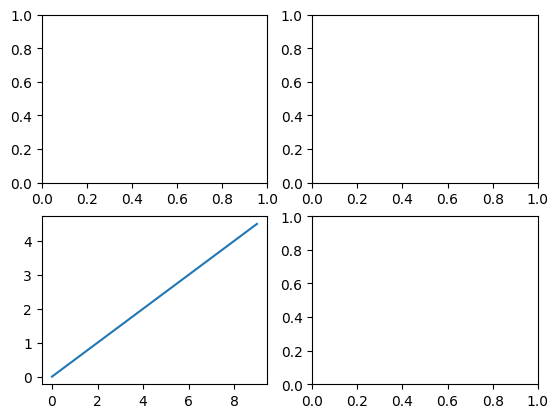

In [56]:
fig, ((axs0, axs1), (axs2,axs3)) = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
axs2.plot(np.arange(0, 10),np.arange(0, 5, 0.5)) # plotting it into axs2

![image.png](attachment:image.png)

Subplots are convenient for if you want to plot multiple things at once, but can also be dense and difficult to read, so let's take a look at some regular plots

In [57]:
# something simpler
indexes_2 = np.linspace(0, 7, 50000)
exponential_array_2 = 10**indexes_2
result_2 = vectorize_H_mag_2(exponential_array_2)

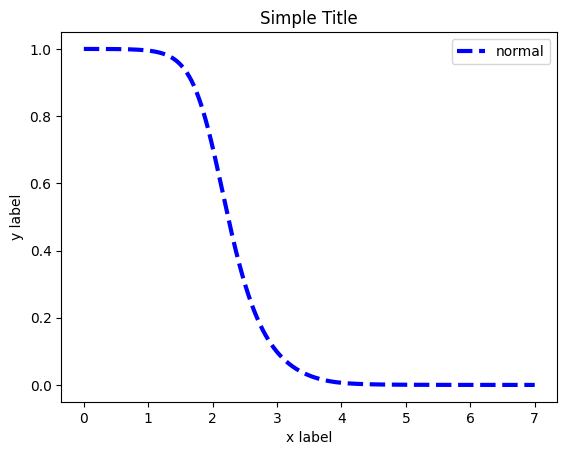

In [58]:
fig, ax = plt.subplots()  # a figure with a single Axes
# ax.plot(indexes_2, result_2, label = "normal")
ax.plot(indexes_2, result_2, label = "normal", color='blue', linewidth=3, linestyle='--')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Title")  # Add a title to the axes.
ax.legend()

So far, we've seen traditional plots with 2 axes, one for $x$ and one for $y$, but `plt` really supports a variety of different kinds of plots, basically anything you can imagine.

The below 2 cells plot out matrices as heatmaps, so that every unique value of the matrix receives a color, and all entries that match that value will be shaded on the grid as that color.

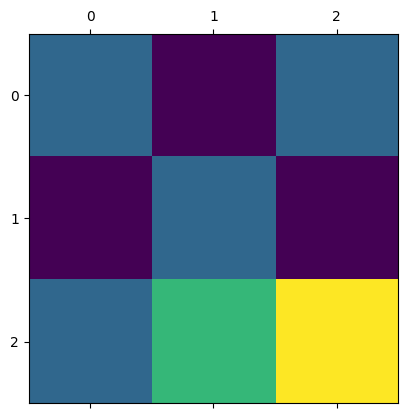

In [59]:
# matrix plot

matrix = np.array([[1, 0, 1], [0,1,0], [1, 2, 3]])
fig, ax = plt.subplots()
ax.matshow(matrix)
plt.show()

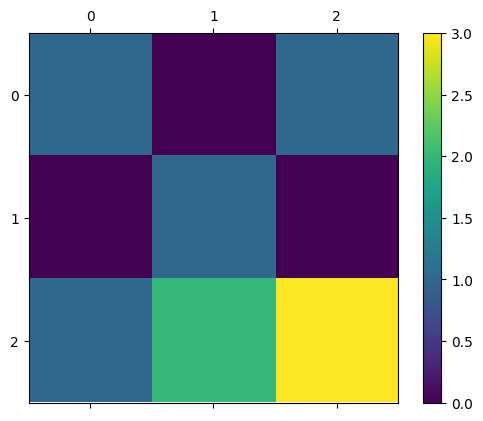

In [60]:
# matrix plot with a color bar

matrix = np.array([[1, 0, 1], [0,1,0], [1, 2, 3]])
fig, ax = plt.subplots()
displayed_matrix = ax.matshow(matrix)
fig.colorbar(displayed_matrix)
plt.show()

The last 2 cells showed us how to plot out matrices, and while the value of that might not seem particularly obvious at first, similar plots are used for heatmaps, which allow us to compare correlation between any number features in the form of a covariance matrix plotted out like above. Don't worry if you don't understand what that means yet, it's just a little explanation of what these matrix plots are useful for.

**Note:** you can also use imshow() instead of matshow(), and you can display images instead of matrices (as they are essentially matrices).

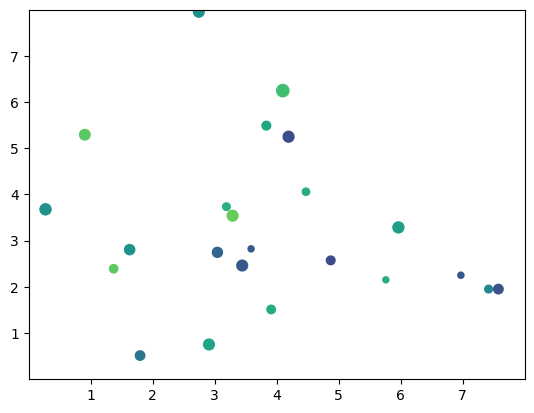

In [61]:

#scatter with trendline

np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

The following are various other plots that `plt` supports(not a full selection but a series of the common ones), and for any kind of plot you wish to create, feel free to just search up the docs for it.

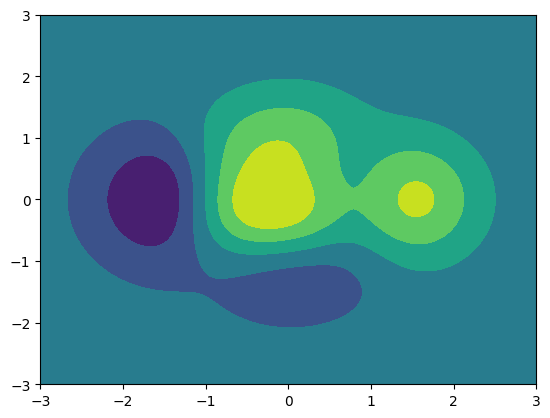

In [62]:
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()

ax.contourf(X, Y, Z, levels=levels)

plt.show()


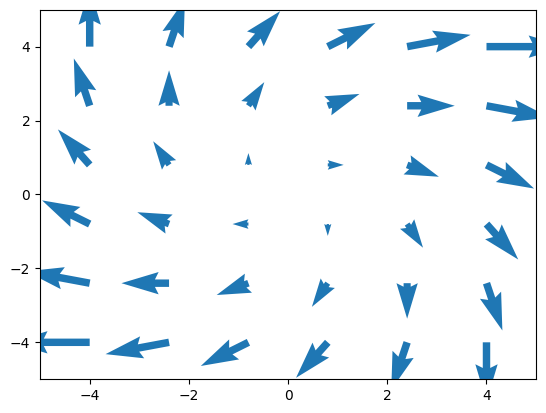

In [63]:
x = np.linspace(-4, 4, 6)
y = np.linspace(-4, 4, 6)
X, Y = np.meshgrid(x, y)
U = X + Y
V = Y - X

# plot
fig, ax = plt.subplots()

ax.quiver(X, Y, U, V, color="C0", angles='xy',
          scale_units='xy', scale=5, width=.015)

ax.set(xlim=(-5, 5), ylim=(-5, 5))

plt.show()

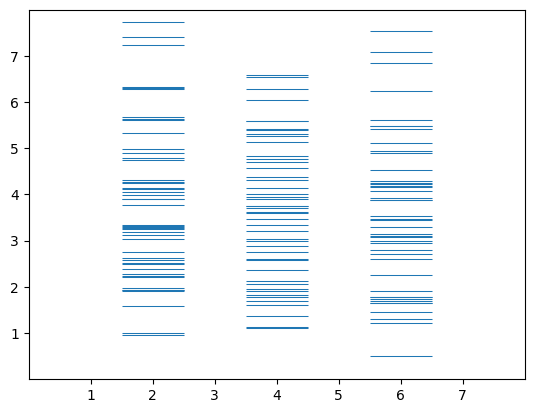

In [64]:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))

# plot:
fig, ax = plt.subplots()

ax.eventplot(D, orientation="vertical", lineoffsets=x, linewidth=0.75)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

This next cell creates a histogram, which is one of the most commonly used styles of plots in stats/data science.

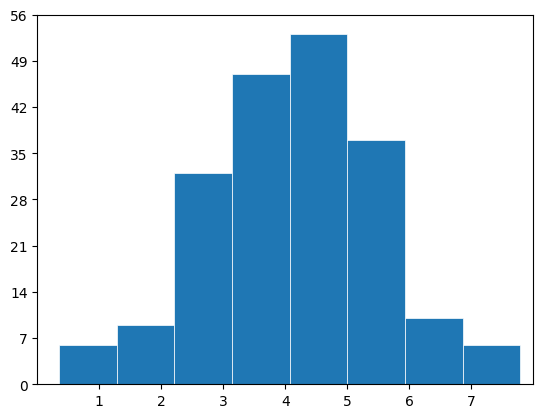

In [65]:
# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

`plt` doesn't only support 2 dimensional plots, but also 3D plots as well(although these aren't always as common), but it allows us to visualize in more than just 2D so that we can view the distribution of points in 3D as well.

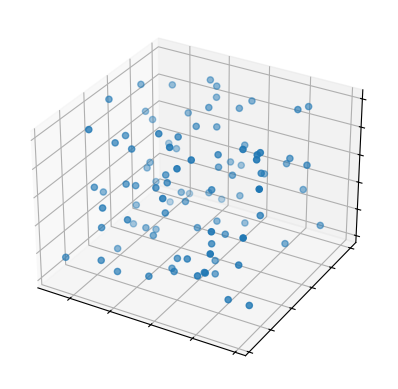

In [66]:
np.random.seed(19680801)
n = 100
rng = np.random.default_rng()
xs = rng.uniform(23, 32, n)
ys = rng.uniform(0, 100, n)
zs = rng.uniform(-50, -25, n)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(xs, ys, zs)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

Commonly used in engineering applications is the concept of time series, where a single value changes over time. Visualizing this time series is essentially like displaying a line plot, where the $x$ axis represents time, and every tick on the axis is a set amount of time. The $y$ axis then, represents the actual magnitude of the value that is changing in our time series. Let's take a look at plotting out a single time series.

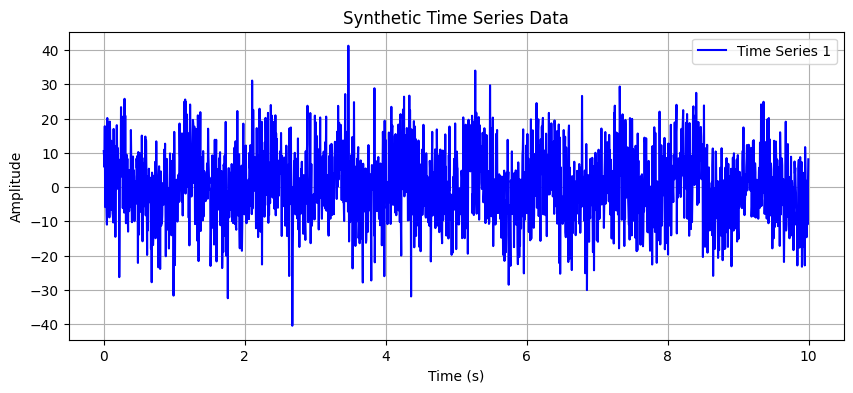

In [67]:
#Don't worry about what this code does, it just generates a synthetic time series for us to try plotting out.
# Assuming a 1 Hz sine wave with added noise
fs = 200  # Sampling frequency
t = np.arange(0, 10, 1/fs)  # 10 seconds of data
frequency = 1  # Frequency of the sine wave (in Hz)
amplitude = 5  # Amplitude of the sine wave
noise_amplitude = 10  # Amplitude of noise
time_series = amplitude * np.sin(2 * np.pi * frequency * t) + np.random.normal(0, noise_amplitude, len(t))

# Plot the EEG data
plt.figure(figsize=(10, 4))
plt.plot(t, time_series, color='b', label='Time Series 1')
plt.title('Synthetic Time Series Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

EEG data, which is primarily what our club works with, as well as almost all noninvasive neurotechnology, is a time series of the voltage potential detected by the sensors we use. Visualizing EEG data like we did above in the time series is a useful utility.

#Pandas

A lot of the times, data is stored in `.csv` files, which stands for Comma Separated Values. This is for tabular data, like what you see in Excel or Google Sheets, where every row represents a subject and every column represents some feature or quantity of that subject.

In [68]:
import pandas as pd #we shorten pandas to pd for convenience

#make a random data frame with 100 rows and 5 columns
df = pd.DataFrame(np.random.rand(100, 5), columns=['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])

#display the first 5 rows of the dataframe
df.head()

,Column1,Column2,Column3,Column4,Column5
0,0.783776,0.439970,0.133523,0.429709,0.117387
1,0.332441,0.782332,0.466570,0.437216,0.696437
2,0.646117,0.906060,0.404084,0.457872,0.930439
3,0.910770,0.824395,0.814666,0.856572,0.590523
4,0.442973,0.059888,0.184254,0.844277,0.048859


In [69]:
#Display the shape of the dataframe, similar to the .shape function for numpy arrays
df.shape

(100, 5)

As you can see `df` is a table with our data stored in it. This table has 100 rows, meaning we have 100 subjects, and 5 columns, which means there are 5 features.

Next, we want to know how to grab rows and columns from our data so that we can work with them individually.

In [70]:
# To fetch a column, we do: df[column_name], where column_name is a string
df['Column1']

,Column1
0,0.783776
1,0.332441
2,0.646117
3,0.910770
4,0.442973
...,...
95,0.294303
96,0.443165
97,0.096738
98,0.679712


Since the `pandas` library represents matrices as `Dataframes`, we can't use the same indexing method we used for `numpy` arrays. Luckily, `pandas` provides us with a useful function: `iloc`.


`.iloc` is confusing to understand at first, but the working becomes easier the more you use it:

For a given Dataframe `df`, selecting rows $r_1$ through $r_2$ and columns $c_1$ through $c_2$, we do the following:

In [71]:
#the values of r_1, r_2, c_1, and c_2 work the same as the slicing you did in numpy
r_1 = 0
r_2 = 2
c_1 = 1
c_2 = 3

#perform the .iloc with our desired inputs
df_smaller = df.iloc[r_1:r_2 + 1, c_1:c_2 + 1] #we add one to r_2 and c_2 because .iloc is exclusive of the last index, just like in numpy

#display the new Dataframe
df_smaller

,Column2,Column3,Column4
0,0.439970,0.133523,0.429709
1,0.782332,0.466570,0.437216
2,0.906060,0.404084,0.457872


`pandas` represents data as `Dataframes`, and it is easy use `pd.read_csv` to grab data from `.csv` files, but often we prefer data to be in the form of a `numpy` matrix. Luckily, there is an easy way to convert a `Dataframe` into a numpy matrix.

In [72]:
#convert to numpy matrix
df_to_numpy = df.values

`df_to_numpy` is now a numpy matrix containing the data that was in our `.csv`!! One line solutions >>>

# Guided Assignment

This section is designed to walk you through some examples of how to use the different libraries you've seen in the lecture! Generally, these are either assignments from other classes or notebook sections from projects that we've done before. We try to give you some boilerplate for the exercise, with lines or sections incomplete (marked with "TODO") for you to figure out.

When doing these problems, try exploring the documentation pages of the libraries to find functions that might support your task.

## Task 1: Phil's Hand Signs 🤌🏼

In this exercise, we'll work with some real signals that the RoboArm project collected on Phil's forearm in Spring 2023!

Download our data file (2.1MB) to your computer from [this link](https://drive.google.com/file/d/13Bv4mO4tkdCBMzgfbAJ3NJQ1CNN6DwgW/view?usp=share_link).

Now let's upload it to this notebook. Click on the file icon in the left tool bar, then click the upload button (leftmost of the four new horizontal icons on top).

In [73]:
# Run this to import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Load the CSV as a Dataframe
df = pd.read_csv('NMEP_NumPy_PhilEMG.csv')
# Hint: filename should be a string


In [77]:
# Let's see what the file looks like
df

,Unnamed: 0,Packet,Ch. 1,Ch. 2,Ch. 3,Ch. 4,?1,?2,?3,?4,?5,?6,?7,?8,Time,Marker
0,0,102.0,10.385702,44.018622,11.765725,10.135129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
1,1,102.0,-3.021839,-46.367280,1.578238,-1.720354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
2,2,103.0,0.063578,-49.523755,8.321277,5.550012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
3,3,103.0,2.487033,-84.645156,5.467734,3.930635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
4,4,104.0,-3.732420,-153.496714,4.633736,0.445048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14505,14505,138.0,12.831597,-44.751643,14.409835,16.107749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
14506,14506,139.0,15.314890,-9.420808,19.690573,16.769711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
14507,14507,139.0,12.981193,-24.357968,15.587903,16.747272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0
14508,14508,140.0,18.306810,-52.956983,15.812297,17.225979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.678073e+09,0.0


It's been a while since Phil recorded these signals. He knows he only used one of the four channels, but doesn't quite remember on which one of the four channels he recorded himself curling his hand (which would give high amplitude data) while leaving the three other electrodes in the air (which probably recorded small scale, noisy data). Can you load all four channels as NumPy Arrays and visualize them to find out which channel has the signal that we want?

(Note: Just fetching the columns from a DataFrame gives you a `pandas.core.series.Series` object, which you can plot just fine with Matplotlib. Having them as NumPy arrays make them much easier to deal with in operations!)

In [78]:
ch_1 = df['Ch. 1']
ch_2 = df['Ch. 2']
ch_3 = df['Ch. 3']
ch_4 = df['Ch. 4']


Now we want to plot each channel to see how they look, and to find the channel that has the important signal!

Hint: to find out which channel has valuable signal, add the `label='labelname'` keyword argument in your plt.plot function, then call plt.legend() later to display the legend.

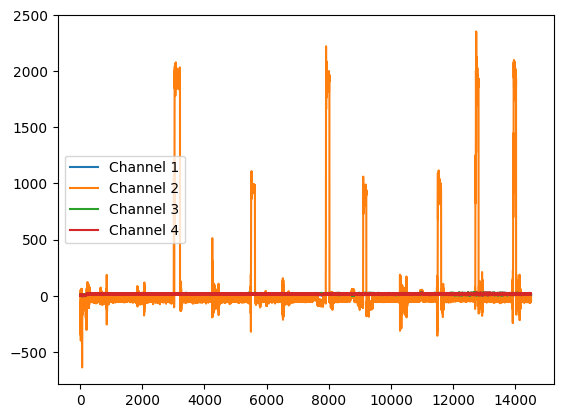

In [79]:
# Complete this for homework
plt.plot(ch_1, label='Channel 1')
plt.plot(ch_2, label='Channel 2')
plt.plot(ch_3, label='Channel 3')
plt.plot(ch_4, label='Channel 4')
plt.legend()

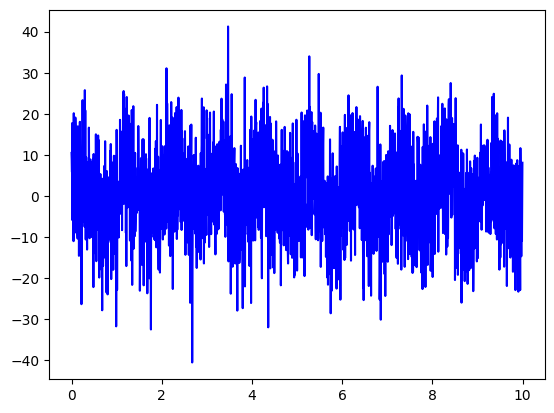

In [80]:
plt.plot(t, time_series, color='b', label='Time Series 1')

What's the channel with noticeably valuable information?

***Channel 2***

In [81]:
# Print the length of the data from this channel
len(ch_2)

14510



```
# This is formatted as code
```

Phil lightly pressed on and wiggled around the electrodes in the first 10 seconds of the recording to make sure they really are taped down. We know that's bad data and want to discard it. Given that we know the OpenBCI Ganglion (the 4-channel biosignal acquisition device in use) samples at 200 Hz (samples per second), can you trim and discard the first 10 seconds of the data from your NumPy array?
Hint: your new array should have 12510 elements, each corresponding to a sample in the data.

In [82]:
# 200 samples per second
ch2_shortened = ch_2[2000:]
print("Length:", len(ch2_shortened)) #should now be 12510

Length: 12510


Let's say the Ganglion amplifies the data by 10x during signal acquisition. Can you rescale the data to reverse the amplification so that we have correct values corresponding to our units, milivolts (mV)?

In [83]:
ch2_shortened = ch_2/10

Finally, plot the processed signal, and give it a title, x- and y-axis labels!

Text(0, 0.5, 'Amplitude (mV)')

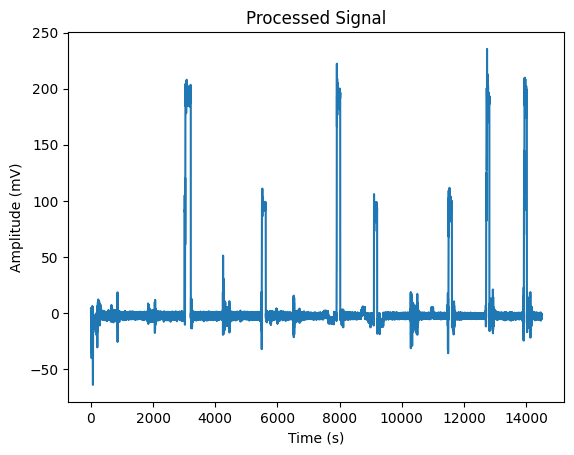

In [84]:
# Complete this for homework

plt.plot(ch2_shortened)
plt.title("Processed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")

**Congrats on finishing Task 1! If you're up to it, here's a fun side quest: how would you classify these hand curls?**

The spike is not held so Phil is not holding is hand in a fist for a long time. Since each curl is about 200 seconds apart, he is not curling his hand very fast.

## Task 2: Graphing Fun!

It's time to make some graphs! Try generating graphs using matplotlib to meet these conditions:

### P2.1: Trigonometry plots

In a single graph, plot the line plots for:
- $y = sin(x)$
- $y = sin(2x)$
- $y = sin(1/x)$
- $y = cos(x) + 1$

Make sure you label your x and y axes, give your graph a title, color the lines different colors, and add a legend that tells us what function each line is.

<ipython-input-91-4d83873b570e>:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.sin(1/t))
<ipython-input-91-4d83873b570e>:5: RuntimeWarning: invalid value encountered in sin
  plt.plot(np.sin(1/t))


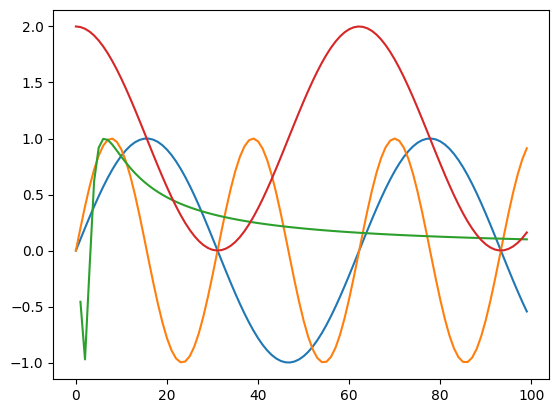

In [91]:
# Complete this for homework
t = np.linspace(0, 10, 100)
plt.plot(np.sin(t))
plt.plot(np.sin(2*t))
plt.plot(np.sin(1/t))
plt.plot(np.cos(t) + 1)

### P2.2: Trigonometry plots, but socially distanced

Now do the same thing, but put each curve in a different subplot!. Create a 2x2 grid of subplots and display each curve in a individual subplot.

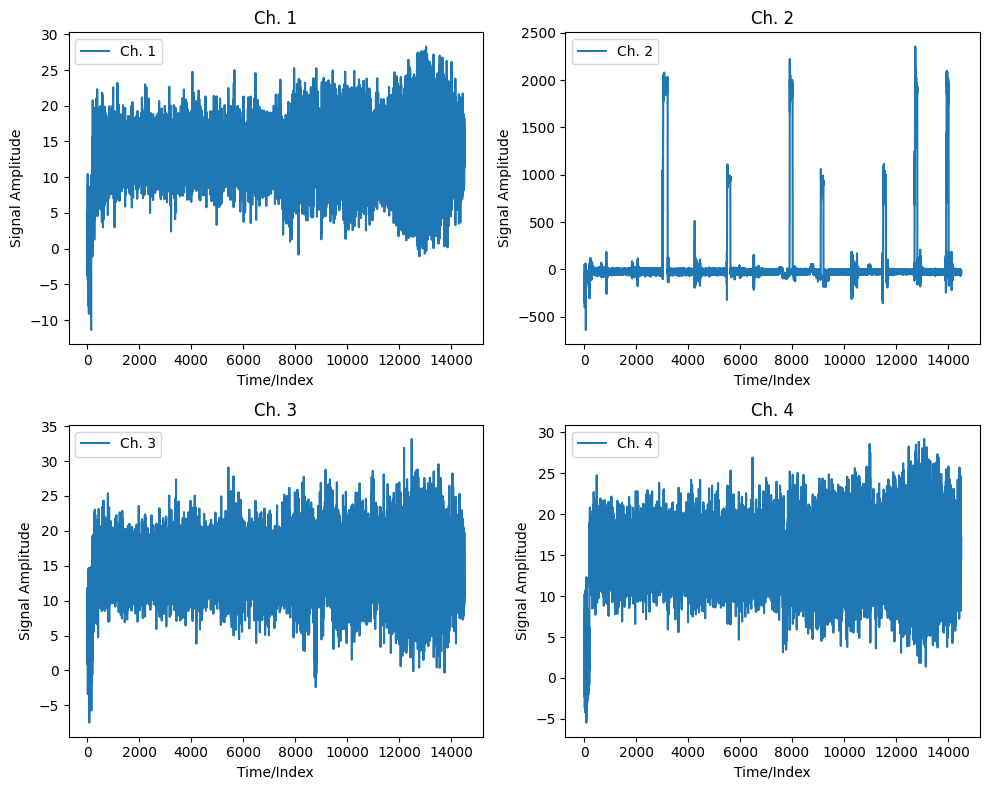

In [86]:
# Complete this for homework
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the 2D array of axes to easily iterate over it
axs = axs.ravel()
channels = ['Ch. 1', 'Ch. 2', 'Ch. 3', 'Ch. 4']

# Iterate over each subplot
# Plot each channel in a different subplot
for i, channel in enumerate(channels):
    axs[i].plot(df[channel], label=channel)
    axs[i].set_title(channel)  # Set the title as the channel name
    axs[i].set_xlabel("Time/Index")  # X-axis label
    axs[i].set_ylabel("Signal Amplitude")  # Y-axis label
    axs[i].legend()  # Add legend

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

### P2.3: Put a smile on that face!

Manipulate the following matrix and display it using matplotlib to create a smiley face! The smiley face must be 7x7 pixels, and the background, face outlines, and interior of the face should all have different colors

<ipython-input-92-80cb92ee9049>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')  # You can choose different colormaps or define your own


(-0.5, 6.5, 6.5, -0.5)

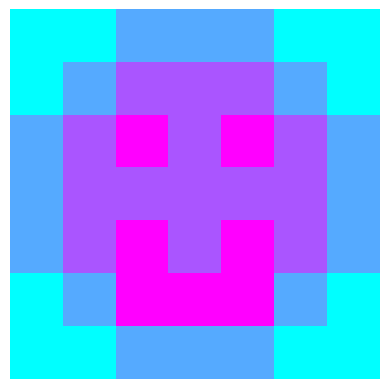

In [92]:
# Phil this in
smiley_matrix = np.array([
    [0, 0, 1, 1, 1, 0, 0],  # Top row (background and face outline)
    [0, 1, 2, 2, 2, 1, 0],  # Second row (eyes part of face outline)
    [1, 2, 3, 2, 3, 2, 1],  # Eyes and part of the face
    [1, 2, 2, 2, 2, 2, 1],  # Middle row, mouth starts
    [1, 2, 3, 2, 3, 2, 1],  # More of the face
    [0, 1, 3, 3, 3, 1, 0],  # Bottom part (smile)
    [0, 0, 1, 1, 1, 0, 0]   # Bottom row (face outline and background)
])

# Define a custom color map for the smiley face
cmap = plt.cm.get_cmap('cool')  # You can choose different colormaps or define your own

# Display the matrix using imshow
plt.imshow(smiley_matrix, cmap=cmap)

# Remove axis labels for a cleaner look
plt.axis('off')

In [93]:
# Phil in the plot

### Congrats on making it to the end!